In [1]:
# Necessary libraries are installed:
! pip install matplotlib
! pip install pandas 
! pip install numpy
! pip install sklearn 
! pip install xgboost


In [2]:
# Necessary imports 
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Reading the data from the parkinsons.data file 
#(can be obtained from: https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data)

df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Selecting necessary features - all but 'status'
features=df.loc[:,df.columns!='status'].values[:,1:]
# Selecting necessary labels - all those in the 'status' column (contains 0's and 1's)
labels=df.loc[:,'status'].values

In [5]:
# counting the number of labels for 0 and for 1
print("Number of 0's:",labels[labels==0].shape[0], "\nNumber of 1's:",labels[labels==1].shape[0])

Number of 0's: 48 
Number of 1's: 147


In [6]:
# Scale the features between -1 and 1 to normalize them - use MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [7]:
best_accuracy = 0
best_training_amt = 0
yaxis=[]
xaxis=[]
for i in range(1,100):
    # splitting the dataset into training and testing sets
    test_amt = i/100
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=test_amt, random_state=7)

    # training the model
    model=XGBClassifier()
    model.fit(x_train,y_train)
    
    # calculating the accuracy by using the predicted values for the x_test
    accuracy=accuracy_score(y_test, model.predict(x_test))*100
    
    if(accuracy>best_accuracy):
        best_accuracy=accuracy
        best_training_amt=i
        
    yaxis.append(accuracy)
    xaxis.append(str(i))    

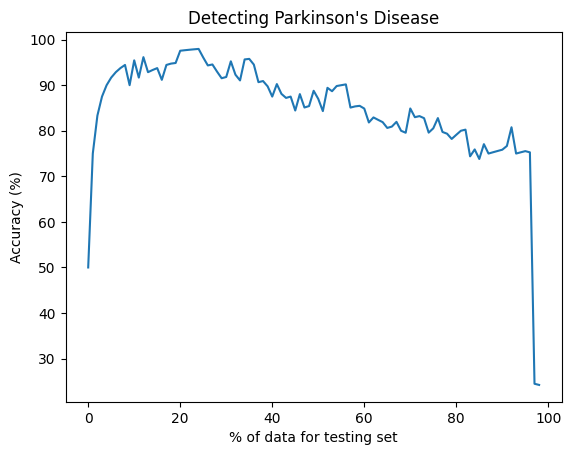

**********************************************
The accuracy was the highest with 97.96% when the testing set was 25% of the data set
**********************************************


In [8]:
plt.title("Detecting Parkinson's Disease")
plt.xlabel("% of data for testing set")
plt.ylabel("Accuracy (%)")
plt.plot(yaxis)
plt.show()
print("**********************************************\nThe accuracy was the highest with {}% when the testing set was {}% of the data set\n**********************************************".format('%.2f' % best_accuracy,best_training_amt))
